<h1><center> Temperature notebook <h1><center> 

In [5]:
import xarray
import matplotlib.pyplot as plt
import os 
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

## 1- Dataset
Daily data from 1940-2022. 0.25 degrees spatial resolution, lonlat grid. Streamfunction calculated from u and v winds using cdo.

In [6]:
t2m_med_path = "data/t2m_era5_1940_2022_mediteranean.nc"

In [7]:
t2m_data = xarray.open_dataset(t2m_med_path)
print(t2m_data)

<xarray.Dataset> Size: 3GB
Dimensions:    (time: 30316, bnds: 2, longitude: 201, latitude: 61)
Coordinates:
  * time       (time) datetime64[ns] 243kB 1940-01-01T11:00:00 ... 2022-12-31...
  * longitude  (longitude) float32 804B -10.0 -9.75 -9.5 ... 39.5 39.75 40.0
  * latitude   (latitude) float32 244B 45.0 44.75 44.5 44.25 ... 30.5 30.25 30.0
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 485kB ...
    t2m        (time, latitude, longitude) float64 3GB ...
Attributes:
    CDI:          Climate Data Interface version 1.9.10 (https://mpimet.mpg.d...
    Conventions:  CF-1.6
    history:      Wed Jun 05 15:44:23 2024: cdo -sellonlatbox,-10,40,30,45 /s...
    frequency:    day
    CDO:          Climate Data Operators version 1.9.10 (https://mpimet.mpg.d...


In [10]:
print(t2m_data.time[3].values)

1940-01-04T11:00:00.000000000


In [14]:
print(t2m_data['time'].min().values)
print(t2m_data['time'].max().values)
print(t2m_data['t2m'].attrs)

# recupère la premiere année de la base de données 
# je veux juste l'année

print(t2m_data['time.year'].min().values)


1940-01-01T11:00:00.000000000
2022-12-31T11:00:00.000000000
{'long_name': '2 metre temperature', 'units': 'K', 'cell_methods': 'time: mean'}
1940


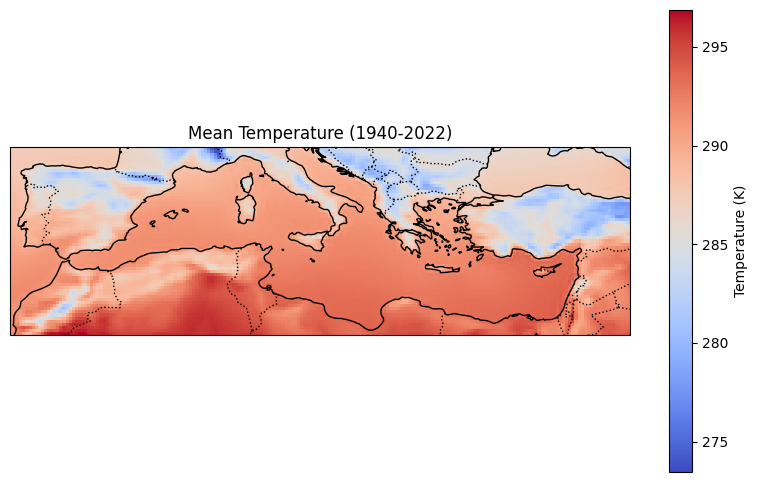

In [5]:
mean_temp = t2m_data['t2m'].mean(dim='time')

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
mean_temp.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'Temperature (K)'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Mean Temperature (1940-2022)')
plt.show()

ValueError: The input coordinate is not sorted in increasing order along axis 0. This can lead to unexpected results. Consider calling the `sortby` method on the input DataArray. To plot data with categorical axes, consider using the `heatmap` function from the `seaborn` statistical plotting library.

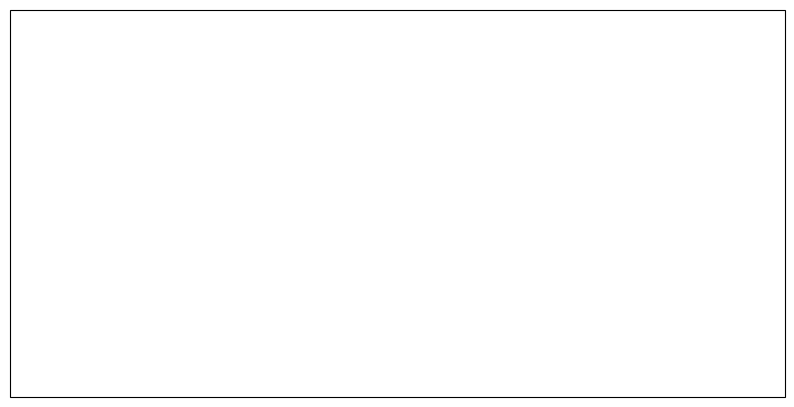

In [9]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Sélectionnez la variable de données à tracer
mean_temp = t2m_data['t2m'].mean(dim='time')

# Repliez les longitudes pour couvrir la planète entière
mean_temp_wrapped = mean_temp.roll(longitude=mean_temp.sizes['longitude']//2, roll_coords=True)

plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

mean_temp_wrapped.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', cbar_kwargs={'label': 'Temperature (K)'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Mean Temperature (1940-2022)')
plt.show()


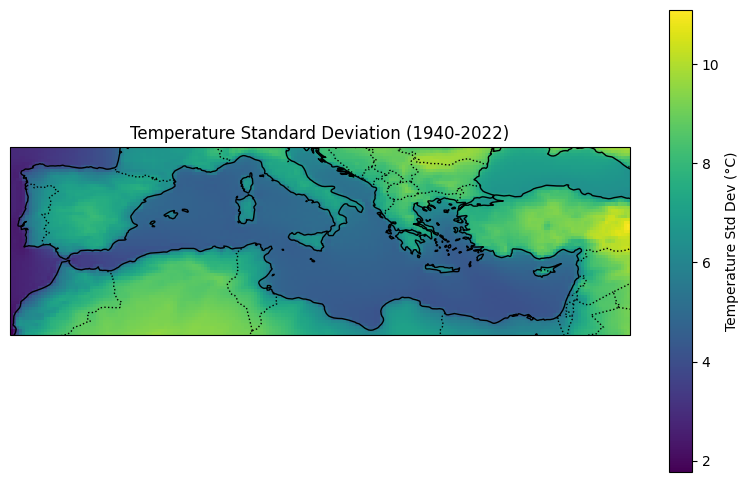

In [ ]:
# Compute the standard deviation of temperature over the entire period
std_temp = t2m_data['t2m'].std(dim='time')

# Plot the standard deviation using Cartopy
plt.figure(figsize=(10, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
std_temp.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', cbar_kwargs={'label': 'Temperature Std Dev (°C)'})
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title('Temperature Standard Deviation (1940-2022)')
plt.show()

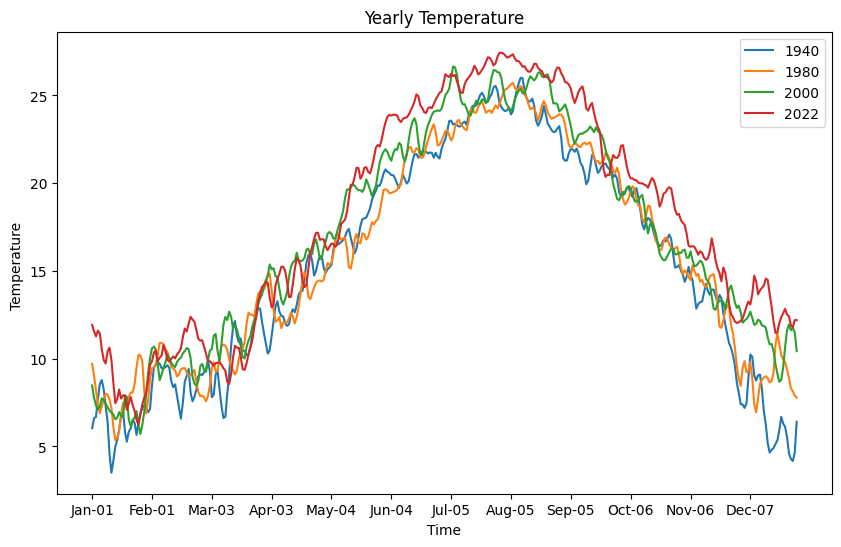

In [ ]:
import matplotlib.pyplot as plt

# Select the temperature data for 2022
def plot_year_temp(years):
    # create figure, ax
    plt.figure(figsize=(10, 6))
    ax = plt.axes()

    for year in years:
        start_date = f'{year}-01-01'
        end_date = f'{year}-12-31'

        # Check if the specified time range is within the dataset's bounds
        dataset_start = str(t2m_data['time'].min().values)[:10]
        dataset_end = str(t2m_data['time'].max().values)[:10]

        if start_date < dataset_start:
            print(f"Start date {start_date} is before the dataset start date {dataset_start}. Adjusting start date.")
            start_date = dataset_start
        if end_date > dataset_end:
            print(f"End date {end_date} is after the dataset end date {dataset_end}. Adjusting end date.")
            end_date = dataset_end

        time_range = slice(start_date, end_date)
        t2m_year = t2m_data.sel(time=time_range).mean(dim="latitude").mean(dim="longitude") 

        # remove the year from the time values
        t2m_year['time'] = t2m_year['time'].dt.strftime('%b-%d')
        ax.set_xticks(range(0, len(t2m_year['time']), 31))

        
        # Plot the temperature curve
        ax.plot(t2m_year['time'], t2m_year['t2m'] - 273.16, label=year) 
        ax.set_xlabel('Time')
        
        ax.set_ylabel('Temperature ')
        ax.set_title('Yearly Temperature')
        ax.legend()
    plt.show()

years = [1940,1980,2000,2022]
plot_year_temp(years)

## 2- Temporal analysis

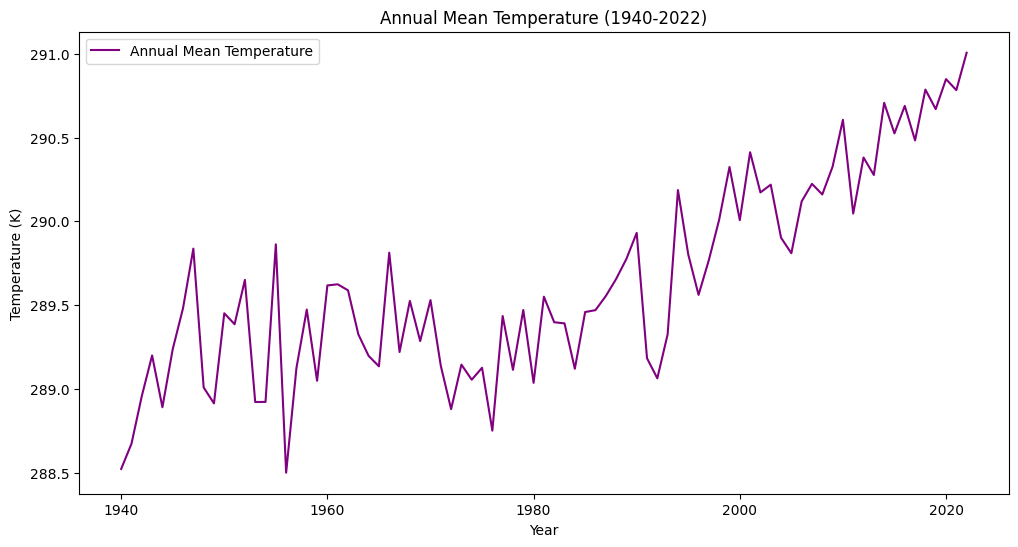

In [ ]:
# Compute annual mean temperatures
annual_mean_temp = t2m_data['t2m'].groupby('time.year').mean(dim='time').mean(dim="longitude").mean("latitude")


# Plot the annual mean temperature
plt.figure(figsize=(12, 6))
plt.plot(annual_mean_temp['year'], annual_mean_temp, label='Annual Mean Temperature', color = "purple")
plt.xlabel('Year')
plt.ylabel('Temperature (K)')
plt.title('Annual Mean Temperature (1940-2022)')
plt.legend()
plt.show()

<xarray.DataArray 't2m' (time: 30316, latitude: 61, longitude: 201)> Size: 3GB
array([[[-2.08663220e+00, -2.08591193e+00, -2.12107191e+00, ...,
         -1.87916949e+01, -1.90885140e+01, -1.90129585e+01],
        [-2.14811953e+00, -2.12360999e+00, -2.13450479e+00, ...,
         -1.85930847e+01, -1.87387337e+01, -1.84772237e+01],
        [-2.23842133e+00, -2.16329703e+00, -2.13260206e+00, ...,
         -1.80452981e+01, -1.77023269e+01, -1.74997000e+01],
        ...,
        [-1.51672575e+00, -3.83120368e+00, -6.22770506e+00, ...,
         -7.87902440e+00, -7.86816212e+00, -7.73769460e+00],
        [-7.02038117e-01, -1.69611550e+00, -3.80855340e+00, ...,
         -7.52889976e+00, -7.58931673e+00, -7.69818287e+00],
        [-4.14489838e-01, -2.27103010e+00, -3.87093503e+00, ...,
         -7.61469465e+00, -7.68174267e+00, -7.83589315e+00]],

       [[-1.67207180e+00, -1.73638062e+00, -1.81218377e+00, ...,
         -2.09315581e+01, -2.15210081e+01, -2.15633178e+01],
        [-1.69901244e+00

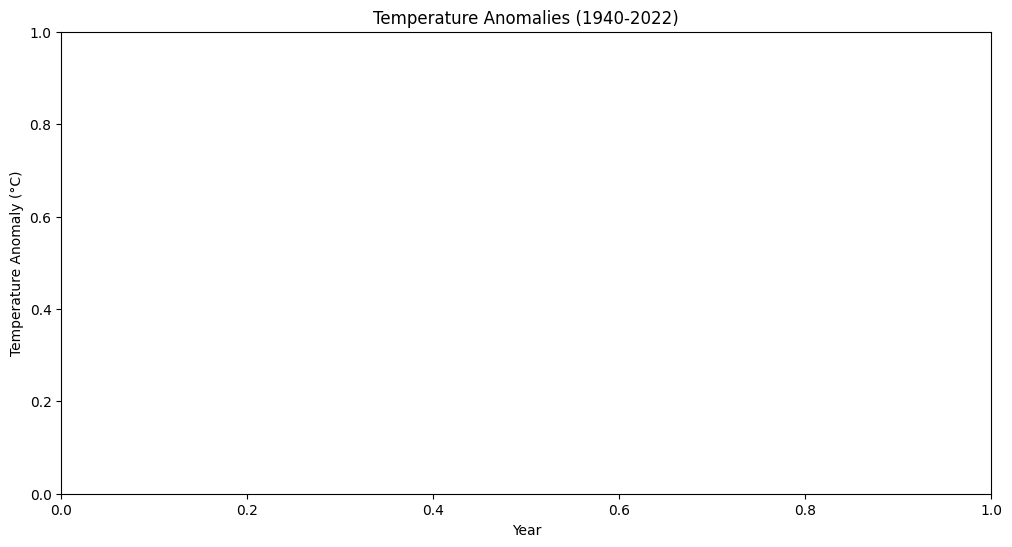

In [ ]:
# Compute temperature anomalies (relative to the 1940-2022 mean)
climatology = t2m_data['t2m'].mean(dim='time')
anomalies = t2m_data['t2m'] - climatology

print(anomalies)

# Plot the temperature anomalies
plt.figure(figsize=(12, 6))
mean_anomalies = anomalies.groupby('time.year').mean(dim='time')

plt.title('Temperature Anomalies (1940-2022)')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.show()

## 3- Spatial analysis

<xarray.DataArray 'season' (season: 4)> Size: 32B
array(['DJF', 'JJA', 'MAM', 'SON'], dtype=object)
Coordinates:
  * season   (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'


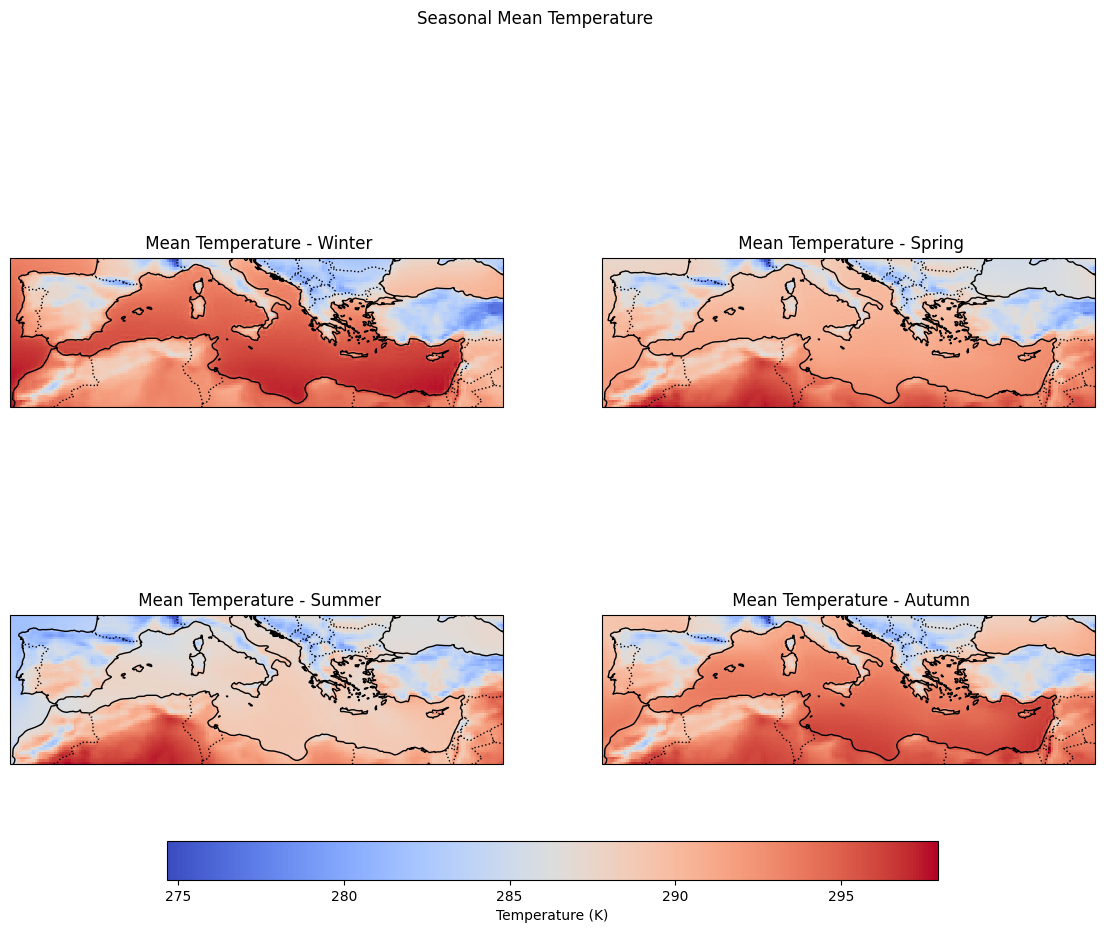

In [ ]:
# Compute seasonal mean temperatures
seasonal_mean_temp = t2m_data['t2m'].groupby('time.season').mean(dim='time')

print(seasonal_mean_temp.season)

# Define seasons to plot
seasons = ['DJF', 'MAM', 'JJA', 'SON']
map_month2season ={"DJF": "Winter", "MAM": "Spring", "JJA": "Summer", "SON": "Autumn"}


projection = ccrs.PlateCarree()
fig, axs = plt.subplots(2, 2, figsize=(14, 10), subplot_kw={'projection': projection})

for ax, season in zip(axs.flat, seasons):
    data_sel = seasonal_mean_temp.sel(season=season)
    im = data_sel.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm', add_colorbar=False)
    ax.coastlines()
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.set_title(f' Mean Temperature - {map_month2season[season]}')

# Add colorbar
cbar = fig.colorbar(im, ax=axs, orientation='horizontal', fraction=0.05, pad=0.1)
cbar.set_label('Temperature (K)')

plt.suptitle('Seasonal Mean Temperature')
plt.show()



In [ ]:
# Compute linear trend over time at each grid point
def linear_trend(x):
    p = np.polyfit(range(len(x)), x, 1)
    return p[0]

trend = t2m_data['t2m'].reduce(linear_trend, dim='time')

# Plot the linear trend
plt.figure(figsize=(10, 6))
trend.plot()
plt.title('Temperature Trend (°C/year)')
plt.show()

TypeError: linear_trend() got an unexpected keyword argument 'axis'

## 4- Temperatures anomalies

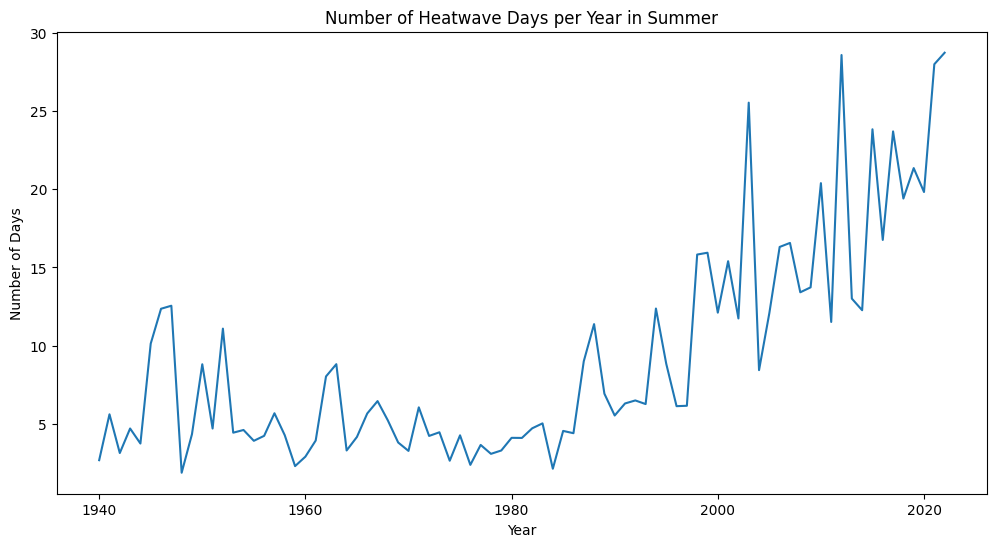

In [ ]:
# we only take the summer
summer = t2m_data['t2m'].sel(time=t2m_data['time.season'] == 'JJA')

# define a threshold for heatwaves
threshold = summer.quantile(0.9, dim='time')
heatwaves = summer > threshold
heatwaves_mean = heatwaves.mean(dim='latitude').mean(dim='longitude')

# Count the number of heatwave days per year
heatwave_days_per_year = heatwaves_mean.groupby('time.year').sum(dim='time')

# Plot the number of heatwave days per year
plt.figure(figsize=(12, 6))
heatwave_days_per_year.plot()
plt.title('Number of Heatwave Days per Year in Summer')
plt.xlabel('Year')
plt.ylabel('Number of Days')
plt.show()

## 5- Clustering

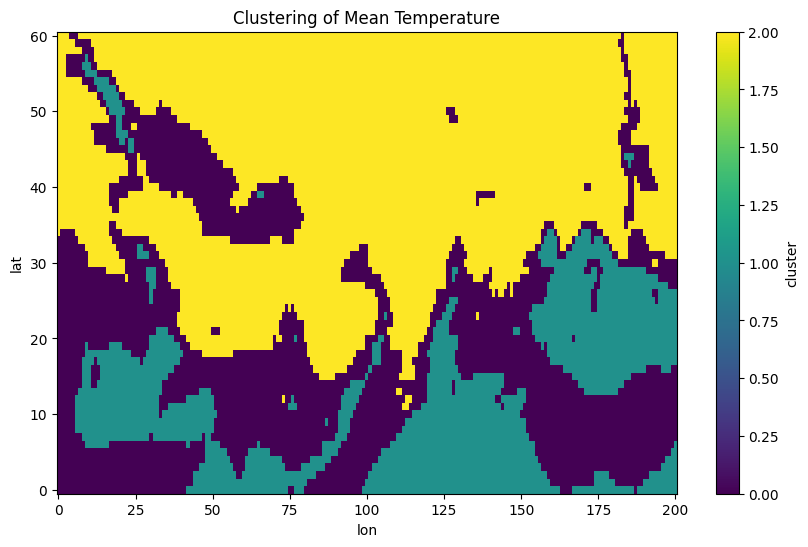

In [ ]:
from sklearn.cluster import KMeans

# Prepare data for clustering (mean temperature per location)
mean_temp_per_location = t2m_data['t2m'].mean(dim='time').values.flatten()

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(mean_temp_per_location.reshape(-1, 1))

# Assign cluster labels to the dataset
clustered_data = t2m_data.copy()
clustered_data['cluster'] = (('lat', 'lon'), labels.reshape(t2m_data['t2m'].shape[1], t2m_data['t2m'].shape[2]))

# Plot the clustered regions
plt.figure(figsize=(10, 6))
clustered_data['cluster'].plot()
plt.title('Clustering of Mean Temperature')
plt.show()

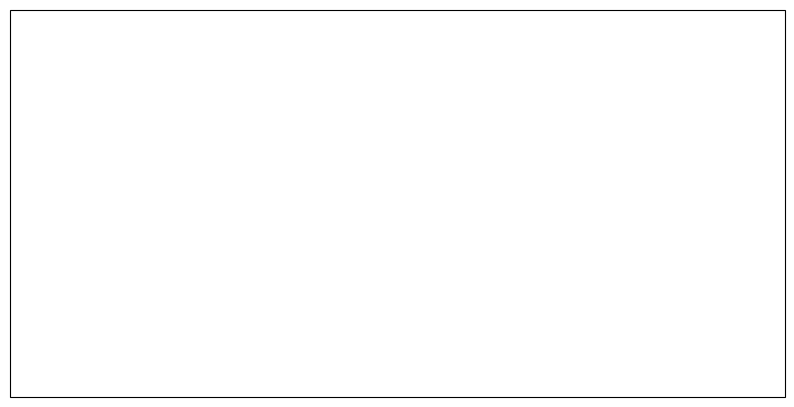

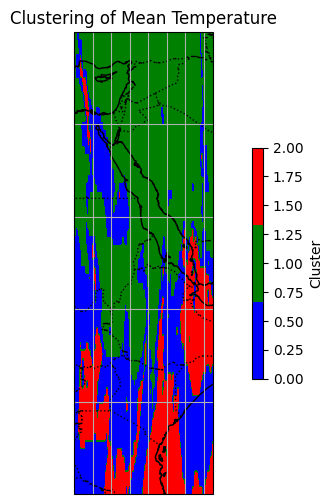

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.cluster import KMeans

# Prepare data for clustering (mean temperature per location)
mean_temp_per_location = t2m_data['t2m'].mean(dim='time').values.flatten()

# Perform K-means clustering
kmeans = KMeans(n_clusters=3)
labels = kmeans.fit_predict(mean_temp_per_location.reshape(-1, 1))

# Assign cluster labels to the dataset
clustered_data = t2m_data.copy()
clustered_data['cluster'] = (('lat', 'lon'), labels.reshape(t2m_data['t2m'].shape[1], t2m_data['t2m'].shape[2]))

# Plot the clustered regions using Cartopy
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection})

# Define custom colormap for clusters
colors = ['blue', 'green', 'red']
cmap = plt.cm.colors.ListedColormap(colors)


#Define the boundaries for the region to display
min_lon, max_lon = 30, 45
min_lat, max_lat = -10, 40
region = [min_lon, max_lon, min_lat, max_lat]

# Plot the clustered regions using Cartopy
projection = ccrs.PlateCarree()
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': projection})

# Plot clustered regions
im = ax.imshow(clustered_data['cluster'], extent=region,
               cmap=cmap, origin='lower', transform=projection)

# Add coastlines and gridlines
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines()

# Add colorbar
cbar = plt.colorbar(im, ax=ax, shrink=0.5)
cbar.set_label('Cluster')

plt.title('Clustering of Mean Temperature')
plt.show()

